# Neural Network from Scratch: Classifying Letters A, B, and C

This project implements a simple feedforward neural network using only NumPy to classify synthetic 5x6 binary images of the letters A, B, and C. The network is trained using custom backpropagation and visualizes loss and accuracy over epochs.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define 5x6 binary patterns for A, B, and C
A = np.array([
    [0,1,1,1,1,0],
    [1,0,0,0,0,1],
    [1,1,1,1,1,1],
    [1,0,0,0,0,1],
    [1,0,0,0,0,1]
])
B = np.array([
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0]
])
C = np.array([
    [0,1,1,1,1,1],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,1,1,1,1]
])

# Flatten to 1D arrays
A_flat = A.flatten()
B_flat = B.flatten()
C_flat = C.flatten()

# Stack as training data
X = np.stack([A_flat, B_flat, C_flat])
# One-hot labels: A=[1,0,0], B=[0,1,0], C=[0,0,1]
y = np.eye(3)

print("Training data shape:", X.shape)
print("Labels shape:", y.shape)

Training data shape: (3, 30)
Labels shape: (3, 3)


In [4]:
# Neural Network architecture and helper functions

# Set random seed for reproducibility
np.random.seed(42)

input_size = 30      # 5x6 pixels
hidden_size = 10     # Number of hidden neurons
output_size = 3      # 3 classes (A, B, C)

# Weight and bias initialization
W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


Epoch 500: Loss=0.0035, Accuracy=1.00
Epoch 1000: Loss=0.0016, Accuracy=1.00
Epoch 1500: Loss=0.0010, Accuracy=1.00
Epoch 2000: Loss=0.0008, Accuracy=1.00
Epoch 2500: Loss=0.0006, Accuracy=1.00
Epoch 3000: Loss=0.0005, Accuracy=1.00
Epoch 3500: Loss=0.0004, Accuracy=1.00
Epoch 4000: Loss=0.0004, Accuracy=1.00
Epoch 4500: Loss=0.0003, Accuracy=1.00
Epoch 5000: Loss=0.0003, Accuracy=1.00


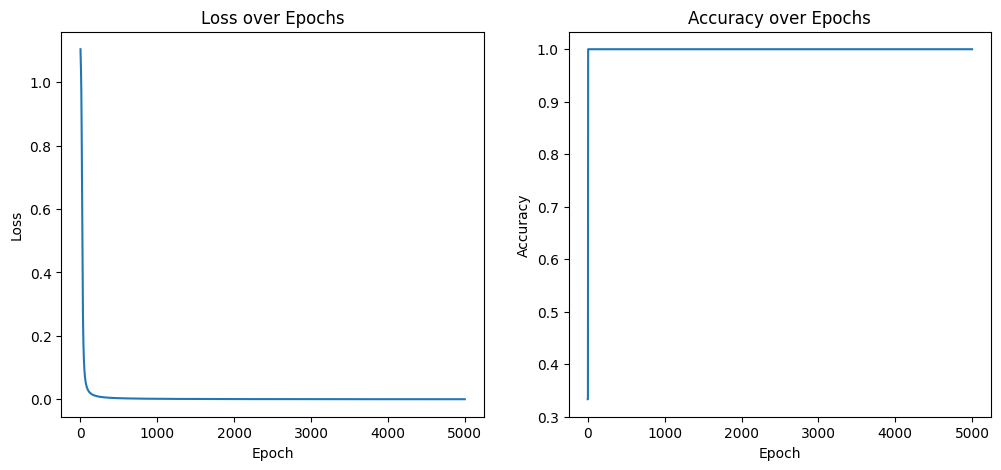

In [5]:
# Feedforward, loss, backpropagation, and training loop

def forward(X):
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def compute_loss(y_true, y_pred):
    # Cross-entropy loss
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

# Training parameters
lr = 0.5
epochs = 5000
losses = []
accuracies = []

for epoch in range(epochs):
    # Forward pass
    z1, a1, z2, a2 = forward(X)
    # Loss and accuracy
    loss = compute_loss(y, a2)
    acc = accuracy(y, a2)
    losses.append(loss)
    accuracies.append(acc)
    # Backpropagation
    m = X.shape[0]
    dz2 = (a2 - y) / m
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = dz2 @ W2.T
    dz1 = da1 * sigmoid_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)
    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
    # Print progress every 500 epochs
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}: Loss={loss:.4f}, Accuracy={acc:.2f}")

# Plot loss and accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


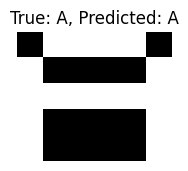

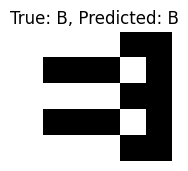

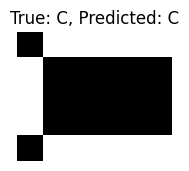

Predicted classes: ['A', 'B', 'C']


In [7]:
# Test the trained model and visualize predictions

letters = ['A', 'B', 'C']
_, _, _, y_pred = forward(X)
pred_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y, axis=1)

for i in range(3):
    plt.figure(figsize=(2,2))
    plt.imshow(X[i].reshape(5,6), cmap='gray', interpolation='nearest')
    plt.title(f"True: {letters[true_classes[i]]}, Predicted: {letters[pred_classes[i]]}")
    plt.axis('off')
    plt.show()

print("Predicted classes:", [letters[idx] for idx in pred_classes])